In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')


from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#  classic clustering 
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/rudresh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# load the json file

with open('job-vs-skill-co-occurences-dict.json', 'r') as f:
    distros_dict = json.load(f)

In [4]:
# read the first file using json
for distro in distros_dict:
    print(distro, distros_dict[distro])
    break

kitchen helper {'kitchen': 1, 'chef': 1}


In [5]:
tempList = []
for distro in distros_dict:
    tempList.append(distro)
print(len(tempList))

9979


In [6]:
# all the function to be used for the analysis

In [7]:
#to retreive the skill name from the distros_dict 

def getSkillFromDict(dic):
    mainDict = {}
    for jobtitle in dic:
        tempdict = {}
        tempdict = dic[jobtitle]
        mainDict =updateDicValue(tempdict,mainDict)
    return mainDict

# to append the dic if they have value is more than one
def updateDicValue(dic1,dic2):
    for (key1,value1) in dic1.items():
        if key1 in dic2:
            value2 = dic2[key1]
            finalvalue = value2+value1
            dic2.update({key1 : finalvalue} )
        else:
            dic2.update({key1 : value1})
    return dic2

In [8]:
# make the word cloud inorder to visualize most frequent skills

def MadeWordCloud(list_text):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    long_text = ' '.join(list_text)
    wordcloud = WordCloud(background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    return wordcloud

In [9]:
# get the name of the job title for the corresponsing skills
def getJobtitleForSkill(skillList,dic):
    mainDict={}
    for key1 in skillList:
        for key2, value in dic.items():
            if key1 in value.keys() and key1 in mainDict.keys() :
                lst = mainDict[key1]
                lst.append(key2)
                mainDict.update({key1 : lst})
            elif key1 in value.keys() and key1 not in mainDict.keys():
                mainDict.update({key1 : [key2]})
    return mainDict

# clean the job title by removing the punctuation and stop words
def cleanTitles(sentence):
    newsent = ''.join(c for c in sentence if c not in punctuation)
    return ' '.join([x for x in newsent.split() if x.lower() not in STOP_WORDS])

loadCities = ['dubai','spanish','india', 'philippines']
loadCountry = ['india','france','afghanistan','spian']

# clean the job skill by removing the city name,country and pucntuation,
def cleanskills(sentence):
    newsent = ''.join(c for c in sentence if c.lower() not in loadCities)
    newsent = ''.join(c for c in newsent if c.lower() not in loadCountry)
    newsent = ''.join(c for c in newsent if c not in punctuation)
    # grammer correction if any
#     newsent = newsent.translate(string.maketrans(“”,””), string.punctuation)
    return ' '.join([x for x in newsent.split() if x.lower() not in STOP_WORDS])

In [10]:
#generic function to convert the dictionary in the list

def getdata(joblistList,df_original):
    tempList=[]
    for i in joblistList:
        value = df_original[i]
        tempList.append(value + ' /n')
    return tempList


# get the name of skill from the list of skill id
def getSkillname(skillList):
    tempList=[]
    for i in skillList:
        value = [v for (k, v) in flatten_skill_list.iteritems() if k == i]
        tempList.append((i,value))
    return tempList


# get the name of jobtitle from the list of jobtitle id
def getjobtitlename(joblistList):
    tempList=[]
    for i in joblistList:
        value = df_jobtitle[i]
        tempList.append(value + ' /n')
    return tempList


#get the root of word from the text 
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# preprocessing function to remove stop words and perform lematization
def preprocess(text):
    result = []
    for token in text:
        if token not in gensim.parsing.preprocessing.STOPWORDS and token is not None:
            result.append(lemmatize_stemming(token))
    return result       

In [11]:
# extract all skills from the dictionary and store the value in allSkillListCount

allSkillDict= getSkillFromDict(distros_dict)
allSkillListCount = sorted(allSkillDict.items(), key=lambda x: x[1], reverse=True)
allSkillListCount[:5]

[('project', 5997),
 ('support', 4418),
 ('business', 4196),
 ('manage', 3435),
 ('software', 2778)]

In [12]:
# convert the list allSkillListCount into dataframe 
skills = pd.DataFrame(allSkillListCount,columns=['skillName','Count'])
skills['Count'] = skills.Count.astype('int')
skills.head()

,skillName,Count
0,project,5997
1,support,4418
2,business,4196
3,manage,3435
4,software,2778


In [13]:
# export the file into the local machine
export_csv = skills.to_csv (r'export_skill.csv', index = None, header=True) 

Text(0.5, 0, 'Count')

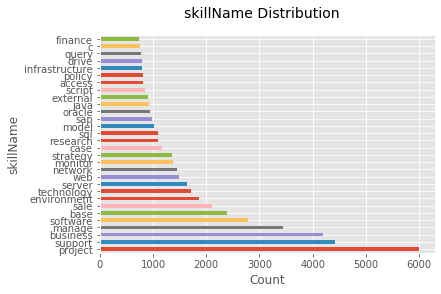

In [14]:
# visualize the top 40 ocurrence of skill 
skills[:30].plot.barh(x='skillName',y='Count',legend=False)
plt.suptitle('skillName Distribution',fontsize=14)
plt.xlabel('Count')

In [15]:
# extract all jobtitle from the dictionary and store the values in jobTitleSkillLen

jobTitleSkillLen = {} 
for distro in distros_dict:
    jobTitleSkillLen.update({distro: len(distros_dict[distro])})

sortedjobTitleSkillLen = sorted(jobTitleSkillLen.items(), key=lambda x: x[1], reverse=True)

sortedjobTitleSkillLen = pd.DataFrame(sortedjobTitleSkillLen,columns=['JobTitle','Count'])
sortedjobTitleSkillLen['Count'] = sortedjobTitleSkillLen.Count.astype('int')
sortedjobTitleSkillLen.head()

,JobTitle,Count
0,software engineer,483
1,project manager,381
2,consultant,357
3,senior software engineer,349
4,software developer,318


In [16]:
export_csv = sortedjobTitleSkillLen.to_csv (r'export_jobtitle.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

Text(0.5, 0, 'Count')

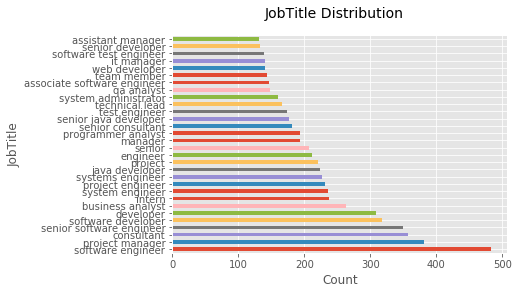

In [17]:
sortedjobTitleSkillLen[:30].plot.barh(x='JobTitle',y='Count',legend=False)
plt.suptitle('JobTitle Distribution',fontsize=14)
plt.xlabel('Count')

In [18]:
SkillWithJobTitleDict = getJobtitleForSkill(list(skills.skillName),distros_dict)

In [19]:
list1=[]
for keys,values in SkillWithJobTitleDict.items():
    list1.append((keys,len(values)))

In [20]:
list1 = sorted(list1, key=lambda tup: tup[1], reverse=True)
skillsJobtitleCount = pd.DataFrame(list1,columns=['skillName','jobtitleCount'])
skillsJobtitleCount['jobtitleCount'] = skillsJobtitleCount.jobtitleCount.astype('int')
skillsJobtitleCount.head()

,skillName,jobtitleCount
0,project,4013
1,support,3188
2,business,2969
3,manage,2608
4,base,1718


Text(0.5, 0, 'Count')

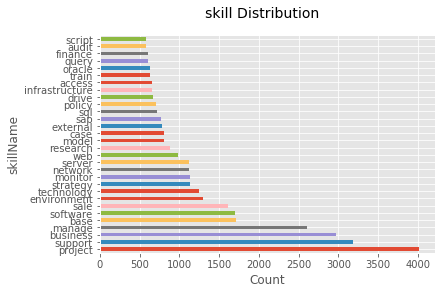

In [21]:
skillsJobtitleCount[:30].plot.barh(x='skillName',y='jobtitleCount',legend=False)
plt.suptitle('skill Distribution',fontsize=14)
plt.xlabel('Count')

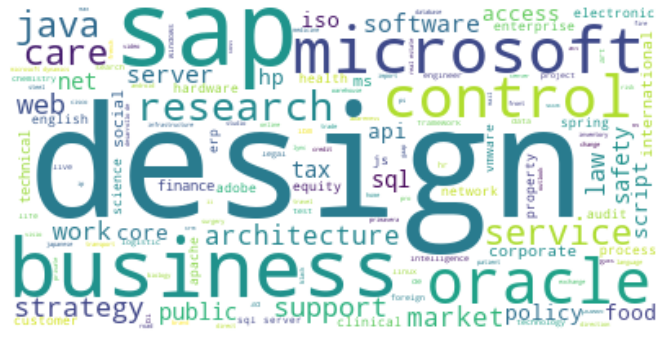

In [22]:
wordcloud_generated = MadeWordCloud(list(allSkillDict.keys()))

In [23]:
wordcloud_generated.words_

{'design': 1.0,
 'sap': 0.875,
 'business': 0.5625,
 'microsoft': 0.53125,
 'oracle': 0.46875,
 'control': 0.46875,
 'research': 0.40625,
 'service': 0.34375,
 'java': 0.34375,
 'care': 0.34375,
 'support': 0.3125,
 'web': 0.3125,
 'strategy': 0.3125,
 'architecture': 0.28125,
 'market': 0.28125,
 'software': 0.25,
 'server': 0.25,
 'work': 0.25,
 'law': 0.25,
 'net': 0.21875,
 'sql': 0.21875,
 'tax': 0.21875,
 'public': 0.21875,
 'safety': 0.21875,
 'access': 0.1875,
 'hp': 0.1875,
 'core': 0.1875,
 'food': 0.1875,
 'policy': 0.1875,
 'api': 0.1875,
 'script': 0.1875,
 'iso': 0.1875,
 'corporate': 0.1875,
 'international': 0.1875,
 'social': 0.1875,
 'ms': 0.1875,
 'technical': 0.15625,
 'finance': 0.15625,
 'enterprise': 0.15625,
 'network': 0.15625,
 'audit': 0.15625,
 'hardware': 0.15625,
 'customer': 0.15625,
 'property': 0.15625,
 'english': 0.15625,
 'electronic': 0.15625,
 'vmware': 0.15625,
 'process': 0.15625,
 'equity': 0.15625,
 'spring': 0.15625,
 'apache': 0.15625,
 'erp'

# Data prepration for topic modelling

In [24]:
df_skill = []
df_jobtitle=[]
for key,value in distros_dict.items():
    if bool(value):
        df_jobtitle.append(key)
        df_skill.append((preprocess(value.keys()),list(value.values())))



In [25]:
df_skill = pd.Series(df_skill)
df_skill.head()

0                            ([kitchen, chef], [1, 1])
1                     ([project, manufacture], [1, 1])
2    ([software, simulink, matlab, software test en...
3                                      ([oracle], [1])
4                                       ([dubai], [1])
dtype: object

In [26]:
countSkillList=[]
SkillList=[]
for keys,values in df_skill:
    SkillList.append(keys)
    countSkillList.append(list(zip(keys, values)))
    
flatten_skill_list = [j for sub in SkillList for j in sub]
flatten_skill_list = gensim.corpora.Dictionary([flatten_skill_list])
# flatten_skill_list =pd.Series(flatten_skill_list)

In [27]:
tupleCountSkill=[]
TitleSkilllist=[]
x=0
for i in countSkillList:
    tempList = []
    for j in range(len(i)):
        skill_id= [k for (k, v) in flatten_skill_list.iteritems() if v ==  i[j][0]][0]
        TitleSkilllist.append((x,skill_id,i[j][1]))
        tempList.append((skill_id,i[j][1]))
    x=x+1
    tupleCountSkill.append(tempList)


In [28]:
df_TitleSkilllist = pd.DataFrame(TitleSkilllist, columns=['jobtitle_id', 'skill_id', 'count'])


# Topic Modelling

In [29]:
lda_model = gensim.models.LdaMulticore(tupleCountSkill, num_topics=10, id2word=flatten_skill_list, passes=2, workers=2)

In [30]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.058*"business" + 0.052*"manage" + 0.044*"project" + 0.037*"sale" + 0.033*"support" + 0.021*"policy" + 0.020*"base" + 0.020*"strategy" + 0.014*"credit" + 0.013*"monitor"
Topic: 1 
Words: 0.042*"project" + 0.037*"manage" + 0.035*"business" + 0.031*"support" + 0.031*"base" + 0.020*"sale" + 0.020*"monitor" + 0.017*"strategy" + 0.015*"technology" + 0.015*"environment"
Topic: 2 
Words: 0.035*"support" + 0.034*"project" + 0.034*"software" + 0.025*"business" + 0.024*"base" + 0.022*"environment" + 0.019*"server" + 0.017*"web" + 0.014*"oracle" + 0.014*"case"
Topic: 3 
Words: 0.075*"project" + 0.048*"business" + 0.047*"support" + 0.035*"sale" + 0.023*"manage" + 0.020*"sap" + 0.017*"software" + 0.014*"model" + 0.012*"base" + 0.012*"research"
Topic: 4 
Words: 0.028*"software" + 0.026*"web" + 0.022*"java" + 0.020*"server" + 0.020*"project" + 0.019*"html" + 0.019*"javascript" + 0.017*"technology" + 0.017*"sql" + 0.015*"c"
Topic: 5 
Words: 0.045*"software" + 0.044*"project" + 0.027*

In [31]:
from gensim import corpora, models

tfidf = models.TfidfModel(tupleCountSkill)
corpus_tfidf = tfidf[tupleCountSkill]

In [32]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=flatten_skill_list, passes=2, workers=4)

In [33]:
for doc in corpus_tfidf:
    print(doc)
    break

[(1099, 0.715472315770316), (364, 0.6986410847969518)]


In [34]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.049*"project" + 0.012*"manage" + 0.011*"software" + 0.010*"base" + 0.010*"web" + 0.009*"case" + 0.009*"monitor" + 0.008*"membership" + 0.007*"support" + 0.007*"aerospace"
Topic: 1 Word: 0.019*"software" + 0.014*"support" + 0.014*"technician" + 0.012*"project" + 0.011*"base" + 0.011*"business" + 0.011*"technology" + 0.010*"core" + 0.009*"manage" + 0.009*"java"
Topic: 2 Word: 0.020*"logistic" + 0.016*"aspect" + 0.015*"support" + 0.015*"monitor" + 0.015*"manage" + 0.014*"project" + 0.013*"software" + 0.011*"c" + 0.011*"business" + 0.011*"base"
Topic: 3 Word: 0.015*"support" + 0.015*"sale" + 0.014*"network" + 0.014*"software" + 0.013*"water" + 0.012*"manage" + 0.012*"profile" + 0.012*"credit" + 0.012*"project" + 0.012*"produce"
Topic: 4 Word: 0.015*"business" + 0.015*"retail" + 0.013*"project" + 0.013*"sale" + 0.013*"strategy" + 0.011*"laboratory" + 0.011*"manage" + 0.010*"manufacture" + 0.009*"truck" + 0.009*"software"
Topic: 5 Word: 0.032*"manage" + 0.017*"project" + 0.0

##  Data cleaning to remove bad words

In [35]:
sortedjobTitleSkillLen['JobTitle'] = sortedjobTitleSkillLen['JobTitle'].apply(lambda x: cleanTitles(x))

In [36]:
skillsJobtitleCount['skillName'] = skillsJobtitleCount['skillName'].apply(lambda x: cleanskills(x))

# Calculate word vector using spacy en_core_web_sm and perfrom the clustering of the skills and jobtitles

In [37]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
# nlp = spacy.load('en_core_web_lg')

In [38]:
vectorsSkills = []
counter = 0 

for index, row in skillsJobtitleCount[1700:].iterrows():
    vectorsSkills.append(nlp(row['skillName']).vector / np.linalg.norm(nlp(row['skillName']).vector))

In [39]:
numclusters   = range(1, 10)
kmeans        = [KMeans(n_clusters=i) for i in numclusters]
kSkill       = [kmeans[i].fit(vectorsSkills) for i in range(len(kmeans))]
scoreSkill   = [kSkill[i].score(vectorsSkills) for i in range(len(kmeans))]
print('scoreSkill done.')
clusterSkill = [kSkill[i].labels_ for i in range(len(kmeans))]
print('clusterSkill done.')

scoreSkill done.
clusterSkill done.


In [40]:
cluster0 = [i for i, e in enumerate(list(clusterSkill[8])) if e == 5]
# 0,1,4,7 is clean
# 5,2,3 is not clean
getdata(cluster0,skillsJobtitleCount['skillName'])

['manage /n',
 'strategy /n',
 'finance /n',
 'direct /n',
 'customer service /n',
 'c /n',
 'ip /n',
 'wireless /n',
 'laboratory /n',
 'mysql /n',
 'mvc /n',
 'safe /n',
 'fit /n',
 'vpn /n',
 'maven /n',
 'selenium /n',
 'command /n',
 'mortgage /n',
 'onshore /n',
 'agile methodology /n',
 'bridge /n',
 'general ledger /n',
 'fda /n',
 'jboss /n',
 'autocad /n',
 'des /n',
 'java script /n',
 'customer experience /n',
 'photoshop /n',
 'kitchen /n',
 'philippines /n',
 'gold /n',
 'ejb /n',
 'testng /n',
 'teradata /n',
 'analog /n',
 'geography /n',
 'medicine /n',
 'wsdl /n',
 'petroleum /n',
 'server 2003 /n',
 'github /n',
 'att /n']

In [41]:
silhouetteSkill   = [silhouette_score(vectorsSkills, kmeans[i + 1].fit_predict(vectorsSkills)) for i in range(len(kmeans) - 1)]
print('silhouettSkill done.')

silhouettSkill done.


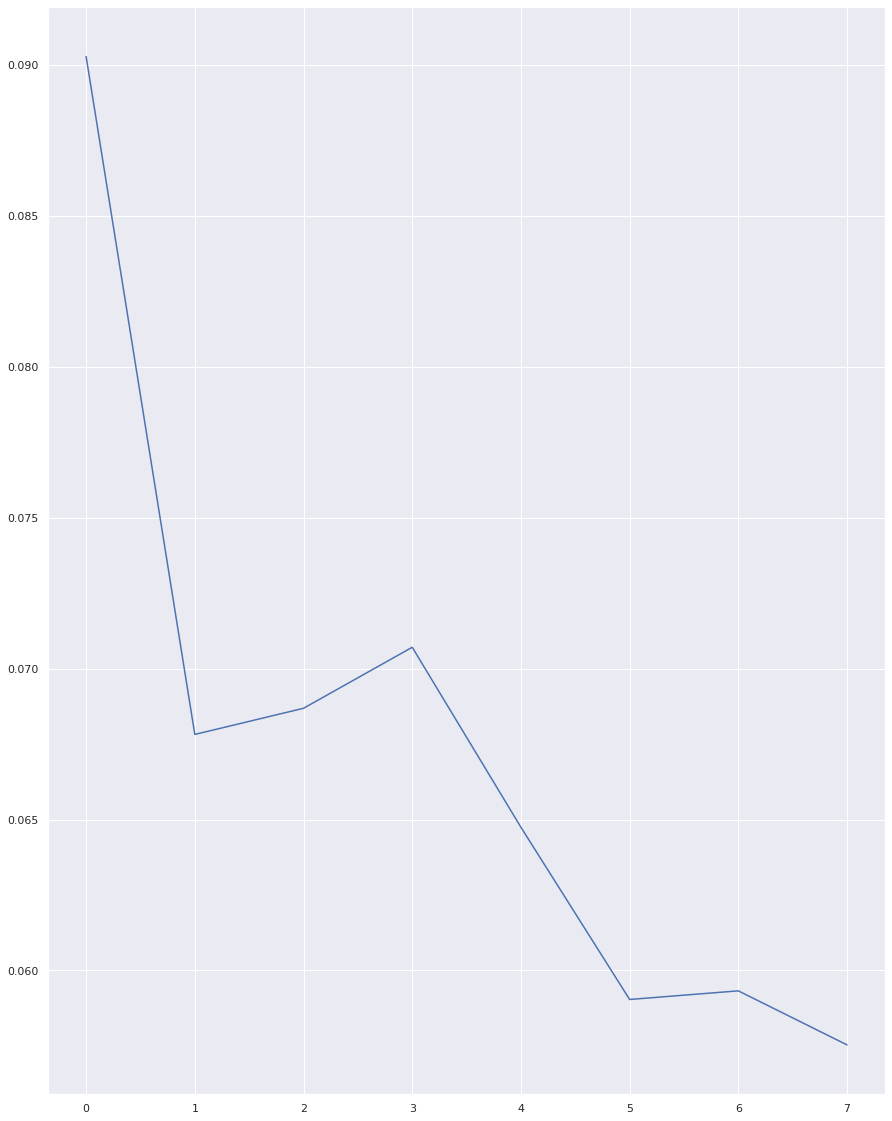

In [42]:
sns.set()
fig, axs = plt.subplots(figsize=(15,20))
axs.plot( silhouetteSkill)
# silhouetteSkill.plot()

# Calculate tf-idf and perfrom the clustering of the skills and jobtitles


In [43]:
TfIdfSkilllist=[]
x=0
for i in corpus_tfidf:
    tempList = []
    for j in range(len(i)):
        TfIdfSkilllist.append((x,i[j][0],i[j][1]))
    x=x+1
        

In [44]:
TfIdfSkilllist = pd.DataFrame(TfIdfSkilllist, columns=['jobtitle_id', 'skill_id', 'value'])
TfIdfSkilllist=TfIdfSkilllist.pivot('jobtitle_id', 'skill_id', 'value').fillna(0)

In [45]:
kmeans = KMeans(n_clusters=30).fit(TfIdfSkilllist)

In [46]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def getSkillname(skillList):
    tempList=[]
    for i in skillList:
        value = [v for (k, v) in flatten_skill_list.iteritems() if k == i]
        tempList.append((i,value))
    return tempList

def getjobtitlename(joblistList):
    tempList=[]
    for i in joblistList:
        value = df_jobtitle[i]
        tempList.append(value + ' /n')
    return tempList
        

In [47]:
print(getjobtitlename(list(ClusterIndicesNumpy(14, kmeans.labels_))))

['microcontroller survey /n', 'research scientist /n', 'validation engineer /n', 'plant product engineer /n', 'quality engineer /n', 'laboratory analyst /n', 'laboratory young engineer /n', 'toolroom manager /n', 'student practice /n', 'sr. information systems validation engineer /n', 'project engineering and consulting project manager and engineering consultant /n', 'technical leader - program manager /n', 'quality manager /n', 'lecturer /n', 'technical manager /n', 'quality assurance assistant /n', 'pharmacovigilance officer /n', 'qa, qc, regulatory affairs & pharmacovigilance consultant /n', 'qa associate /n', 'quality assurance associate /n', 'engineering planner /n', 'qa officer /n', 'associate professor /n', 'quality supervisor & lab engineer /n', 'quality and safety manager /n', 'r&d laboratory technician /n', 'junior scientist, laboratory for biomaterials and regenerative medicine usa /n', 'senior engineering officer (planning) /n', 'senior scientist /n', 'senior qc inspector /

In [48]:
kmeans = KMeans(n_clusters=10).fit(TfIdfSkilllist.T)

In [49]:
print(getjobtitlename(list(ClusterIndicesNumpy(4, kmeans.labels_))))

['project manager / service delivery /n']


# Select the data from the filtered data in order to use it for future model processing

In [50]:
# to do 

#dict_distros_dict = dict((k, v) for k, v in distros_dict.items() if len(v) >= 3)
#filtered_SkillDict= getSkillFromDict(distros_dict)
# identofy the Clusters within the skill set

# Modelling

### Svd based model

In [51]:
train = pd.DataFrame.from_dict(distros_dict, orient='index')
train.reset_index(level=0, inplace=True)
train = train.set_index('index')
train.head()

,kitchen,chef,project,manufacture,software,simulink,matlab,software test engineer,support,base,...,epilepsy,ziekenhuizen,verkoop,ricerca,ericsson oss,bilingual spanish,biodiversity,rtl design,plataforma,pruebas
index,,,,,,,,,,,,,,,,,,,,,
! manager business integration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
""" department / assistant of the department manager",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
""" mep qa/qc electrical inspector",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""account manager (i.t)",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""accounts executive",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
user_util_matrix = train.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(0), axis=1)
user_util_matrix.head(5)

,kitchen,chef,project,manufacture,software,simulink,matlab,software test engineer,support,base,...,epilepsy,ziekenhuizen,verkoop,ricerca,ericsson oss,bilingual spanish,biodiversity,rtl design,plataforma,pruebas
index,,,,,,,,,,,,,,,,,,,,,
! manager business integration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""" department / assistant of the department manager",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""" mep qa/qc electrical inspector",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""account manager (i.t)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""accounts executive",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from surprise import Reader, Dataset, SVD, NMF
from surprise.model_selection import GridSearchCV, cross_validate

In [54]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df( df_TitleSkilllist[['jobtitle_id', 'skill_id', 'count']], reader = reader )
# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7722  1.4878  1.8482  1.4186  1.5442  1.6142  0.1667  
MAE (testset)     0.3789  0.3790  0.3682  0.3572  0.3857  0.3738  0.0100  
Fit time          5.24    5.18    5.16    5.25    5.16    5.20    0.04    
Test time         0.26    0.24    0.23    0.37    0.24    0.27    0.05    


{'test_rmse': array([1.77223306, 1.48776689, 1.84816599, 1.41856546, 1.54424919]),
 'test_mae': array([0.37894706, 0.37902174, 0.36820943, 0.35724002, 0.38570481]),
 'fit_time': (5.236937046051025,
  5.179843425750732,
  5.15745735168457,
  5.252963304519653,
  5.162055015563965),
 'test_time': (0.255967378616333,
  0.23610663414001465,
  0.23409485816955566,
  0.3710629940032959,
  0.24323606491088867)}

In [55]:
param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score : 4.151825269004096
Best Parameters : {'n_factors': 50, 'lr_all': 0.5, 'reg_all': 0.06}
###############


### Matrix recomendation based modelling

In [56]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/home/rudresh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rudresh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rudresh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rudresh/anaconda3/lib/python3.7/site-packages/t

In [72]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies

n_title, n_skill = len(df_TitleSkilllist['jobtitle_id'].unique()), len(df_TitleSkilllist['skill_id'].unique()) 

In [73]:
# Model Architecture


# jobtitle Embeddings
title_input = Input(shape=(1,), name='title_Input')
title_embeddings = Embedding(input_dim = n_title, output_dim=n_latent_factors, input_length=1, 
                              name='title_Embedding') (title_input)
title_vector = Flatten(name='title_Vector') (title_embeddings)


# skill Embeddings
skill_input = Input(shape=(1,), name='skill_Input')
skill_embeddings = Embedding(input_dim = n_skill, output_dim=n_latent_factors, input_length=1, 
                               name='skill_Embedding') (skill_input)
skill_vector = Flatten(name='skill_Vector') (skill_embeddings)


# Dot Product
merged_vectors = dot([title_vector, skill_vector], name='Dot_Product', axes=1)
model = Model([title_input, skill_input], merged_vectors)

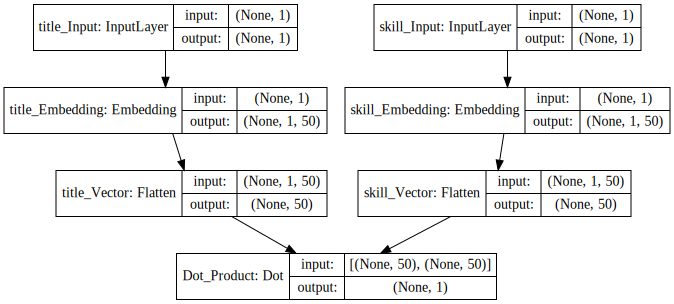

In [74]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [75]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_Input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
skill_Input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
title_Embedding (Embedding)     (None, 1, 50)        480400      title_Input[0][0]                
__________________________________________________________________________________________________
skill_Embedding (Embedding)     (None, 1, 50)        108350      skill_Input[0][0]                
__________________________________________________________________________________________________
title_Vect

In [76]:
X = df_TitleSkilllist.iloc[:,:2]
Y = df_TitleSkilllist.iloc[:,2]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

In [63]:
x_test.head()

,jobtitle_id,skill_id
20705,940,1756
35430,2183,1392
99644,9112,988
47353,3312,1190
32767,1957,1823


In [64]:
optimizer = Adam(lr = 0.0005)

model.compile(loss='mean_squared_error', optimizer = optimizer)

In [65]:
batch_size = 128
epochs = 50

In [66]:
history = model.fit(x=[x_train['jobtitle_id'], x_train['skill_id']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['jobtitle_id'], x_test['skill_id']], y_test))

Instructions for updating:
Use tf.cast instead.
Train on 83276 samples, validate on 20819 samples
Epoch 1/50
 - 6s - loss: 3.8544 - val_loss: 7.4046
Epoch 2/50
 - 6s - loss: 3.4960 - val_loss: 6.5448
Epoch 3/50
 - 6s - loss: 2.5628 - val_loss: 5.7776
Epoch 4/50
 - 6s - loss: 2.1838 - val_loss: 5.5376
Epoch 5/50
 - 5s - loss: 2.0412 - val_loss: 5.4137
Epoch 6/50
 - 5s - loss: 1.9567 - val_loss: 5.3306
Epoch 7/50
 - 6s - loss: 1.8936 - val_loss: 5.2684
Epoch 8/50
 - 6s - loss: 1.8393 - val_loss: 5.2070
Epoch 9/50
 - 6s - loss: 1.7873 - val_loss: 5.1532
Epoch 10/50
 - 6s - loss: 1.7375 - val_loss: 5.1005
Epoch 11/50
 - 5s - loss: 1.6887 - val_loss: 5.0481
Epoch 12/50
 - 5s - loss: 1.6391 - val_loss: 4.9952
Epoch 13/50
 - 6s - loss: 1.5923 - val_loss: 4.9423
Epoch 14/50
 - 6s - loss: 1.5467 - val_loss: 4.8905
Epoch 15/50
 - 6s - loss: 1.5036 - val_loss: 4.8404
Epoch 16/50
 - 6s - loss: 1.4614 - val_loss: 4.7930
Epoch 17/50
 - 6s - loss: 1.4224 - val_loss: 4.7480
Epoch 18/50
 - 6s - loss: 1

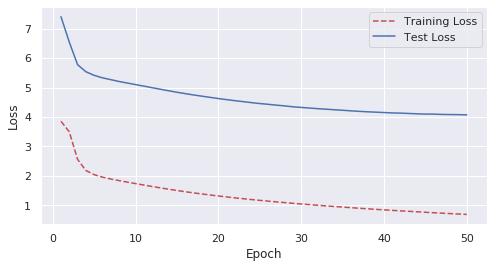

In [67]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [68]:
score = model.evaluate([x_test['jobtitle_id'], x_test['skill_id']], y_test)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

20819/20819 [==============================] - 0s 15us/step

RMSE: 2.0180


In [69]:
# Recommendation system

In [70]:
model.predict([x_test['jobtitle_id'][:1], x_test['skill_id'][3:4]])

array([[1.2895508]], dtype=float32)